In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\Students data.csv")

In [4]:
df.head(10)

CGPA Did you do webdev during college time ?  \
0   8.0                                     NaN   
1   8.8                                     yes   
2   7.9                                      no   
3   8.0                                     yes   
4   6.4                                      no   
5   7.2                                     yes   
6   8.4                                     yes   
7   7.3                                      no   
8   8.4                                      no   
9   7.8                                      no   

  Are you good at Data analysis ? reading and writing skills  \
0                              no                  excellent   
1                              no                       poor   
2                              no                       poor   
3                              no                     medium   
4                              no                       poor   
5                              no                       poor   
6                              no                  excellent   
7                             yes                       poor   
8                             yes                       poor   
9                              no                  excellent   

  Are you a tech person ? Were you in a non tech society ?  \
0                      no                               no   
1                     yes                               no   
2                      no                              yes   
3                     yes                               no   
4                      no                              yes   
5                     yes                               no   
6                     yes                              NaN   
7                      no                               no   
8                     yes                              yes   
9                     yes                              yes   

  Are you good at coding ? Have you developed mobile apps ?  \
0                      yes                              yes   
1                      NaN                               no   
2                       no                               no   
3                      yes                              yes   
4                      yes                               no   
5                      yes                              yes   
6                      yes                              yes   
7                      yes                               no   
8                      yes                               no   
9                      yes                               no   

  Are you good at communication ? Do you have specialization in security  \
0                              no                                     no   
1                              no                                     no   
2                             yes                                     no   
3                              no                                     no   
4                             yes                                     no   
5                              no                                     no   
6                              no                                     no   
7                              no                                     no   
8                             yes                                     no   
9                             yes                                     no   

  Have you ever handled large databases ?  \
0                                      no   
1                                      no   
2                                      no   
3                                     yes   
4                                      no   
5                                      no   
6                                      no   
7                                     yes   
8                                     yes   
9                                      no   

  Do you have knowlege of 

In [5]:
df.shape

(516, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 20 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CGPA                                                  516 non-null    float64
 1   Did you do webdev during college time ?               515 non-null    object 
 2   Are you good at Data analysis ?                       514 non-null    object 
 3   reading and writing skills                            514 non-null    object 
 4   Are you a tech person ?                               516 non-null    object 
 5   Were you in a non tech society ?                      512 non-null    object 
 6   Are you good at coding ?                              514 non-null    object 
 7   Have you developed mobile apps ?                      514 non-null    object 
 8   Are you good at communication ?                       511 no

In [7]:
df.isnull().sum()

CGPA                                                    0
Did you do webdev during college time ?                 1
Are you good at Data analysis ?                         2
reading and writing skills                              2
Are you a tech person ?                                 0
Were you in a non tech society ?                        4
Are you good at coding ?                                2
Have you developed mobile apps ?                        2
Are you good at communication ?                         5
Do you have specialization in security                  3
Have you ever handled large databases ?                 3
Do you have knowlege of statistics and data science?    2
Are you proficient in English ?                         2
Have you ever managed some event?                       1
Do you write technical blogs ?                          1
Are you into marketing ?                                0
Are you a ML expert ?                                   0
Do you have a 

In [8]:
df=df.dropna()

In [9]:
df.shape

(488, 20)

In [10]:
df.isnull().sum()

CGPA                                                    0
Did you do webdev during college time ?                 0
Are you good at Data analysis ?                         0
reading and writing skills                              0
Are you a tech person ?                                 0
Were you in a non tech society ?                        0
Are you good at coding ?                                0
Have you developed mobile apps ?                        0
Are you good at communication ?                         0
Do you have specialization in security                  0
Have you ever handled large databases ?                 0
Do you have knowlege of statistics and data science?    0
Are you proficient in English ?                         0
Have you ever managed some event?                       0
Do you write technical blogs ?                          0
Are you into marketing ?                                0
Are you a ML expert ?                                   0
Do you have a 

In [11]:
#dividing the data in independent variables and target variable
x= df.iloc[:,:-1].values
y= df.iloc[:,19].values

In [12]:
#for replacing missing value with mean value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(x[:, 0:1])
x[:,0:1] = imputer.transform(x[:,0:1])

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#function for encoding all columns of x
for i in range(1,19):
    lc = LabelEncoder()
    x[:, i] = lc.fit_transform(x[:, i])

In [15]:
x

array([[7.9, 0, 0, ..., 0, 0, 0],
       [8.0, 1, 0, ..., 0, 0, 1],
       [6.4, 0, 0, ..., 0, 1, 0],
       ...,
       [7.9, 1, 0, ..., 0, 1, 0],
       [8.5, 1, 1, ..., 1, 0, 0],
       [8.0, 1, 0, ..., 0, 0, 0]], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
lc1 = LabelEncoder()
y = lc1.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
#using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = classifier.fit(X_train, Y_train)

In [19]:
Y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)

In [21]:
cm

array([[ 8,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  5,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  4,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 12,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  1,  1,  1,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2]], dtype=int64)

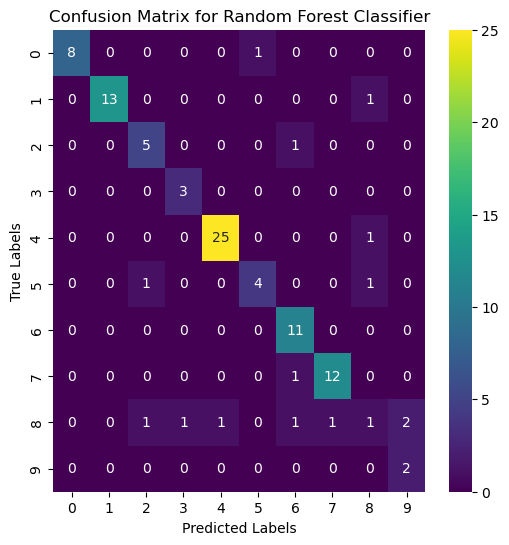

In [22]:
import seaborn as sns

plt.figure(figsize=(6, 6)) 
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d', xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.show()

In [23]:
accuracy_rf = accuracy_score(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))

Accuracy: 85.71%


In [25]:
#using Decision Tree
from sklearn import tree

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10) 

In [27]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, Y_train)

In [28]:
Y_pred = dt.predict(X_test)

In [29]:
Y_pred

array([7, 2, 0, 7, 4, 4, 5, 0, 6, 7, 3, 0, 8, 6, 4, 0, 7, 7, 3, 6, 2, 4,
       2, 4, 1, 4, 0, 5, 4, 2, 8, 4, 0, 8, 0, 2, 4, 5, 7, 6, 6, 2, 4, 2,
       3, 2, 3, 2, 3, 3, 1, 4, 5, 3, 9, 4, 7, 4, 1, 7, 3, 4, 4, 4, 7, 6,
       1, 1, 4, 5, 1, 4, 4, 7, 8, 4, 4, 4, 7, 3, 4, 4, 0, 3, 2, 1, 7, 6,
       9, 3, 1, 0, 1, 6, 3, 4, 4, 2])

In [30]:
cm_decision_tree = confusion_matrix(Y_test,Y_pred)
print("confusion matrics=",cm_decision_tree)

confusion matrics= [[ 7  0  0  0  0  1  0  0  0  0]
 [ 0  9  0  1  1  0  0  0  2  0]
 [ 0  0 11  0  0  0  1  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  1 22  0  0  0  0  0]
 [ 1  0  0  1  1  3  0  0  1  0]
 [ 0  0  0  0  0  1  6  0  0  0]
 [ 1  0  0  0  1  0  0 11  0  0]
 [ 0  0  0  0  1  0  1  1  0  1]
 [ 0  0  0  0  0  0  0  0  1  1]]


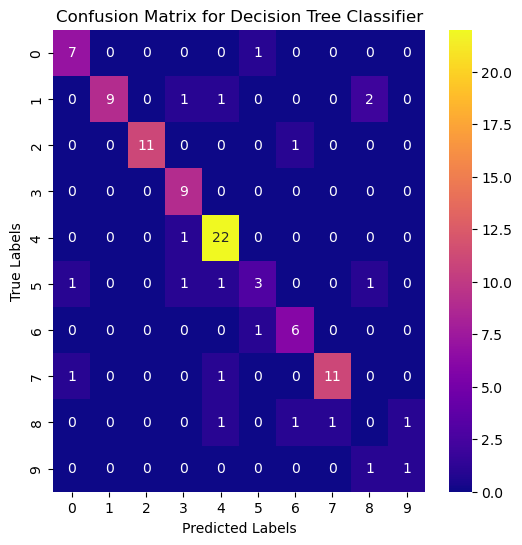

In [31]:
plt.figure(figsize=(6, 6)) 
sns.heatmap(cm_decision_tree, annot=True, cmap='plasma', fmt='d', xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')

plt.show()

In [32]:
accuracy_dt = accuracy_score(Y_test, Y_pred)
print("Accuracy for decision tree: {:.2f}%".format(accuracy_dt * 100))

Accuracy for decision tree: 80.61%


In [33]:
#SVM Classifier
from sklearn import svm

In [34]:
svm = svm.SVC()
svm.fit(X_train, Y_train)

SVC()

In [35]:
Y_pred_svm = svm.predict(X_test)

In [36]:
cm_svm = confusion_matrix(Y_test,Y_pred_svm)

In [37]:
print("confusion matrics of SVM=",cm_svm)

confusion matrics of SVM= [[ 7  0  1  0  0  0  0  0  0  0]
 [ 1 10  0  0  1  0  1  0  0  0]
 [ 0  0 10  0  0  1  1  0  0  0]
 [ 2  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  1 22  0  0  0  0  0]
 [ 0  0  0  1  0  6  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0 11  0  0]
 [ 0  0  0  0  1  0  1  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  2]]


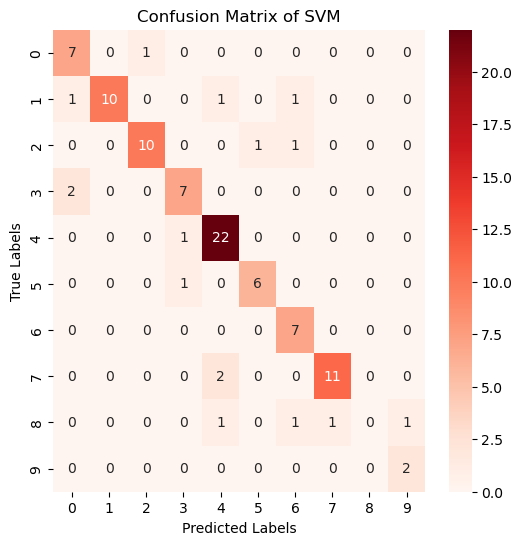

In [38]:
plt.figure(figsize=(6, 6)) 
sns.heatmap(cm_svm, annot=True, cmap='Reds', fmt='d', xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVM')

plt.show()

In [39]:
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy for decision tree: {:.2f}%".format(accuracy_dt * 100))

Accuracy for decision tree: 80.61%


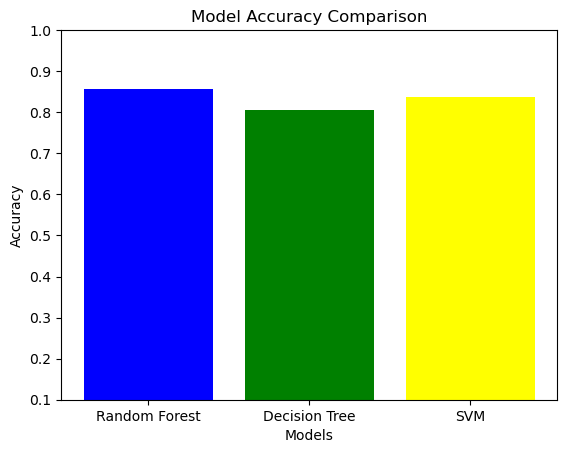

In [41]:
import matplotlib.pyplot as plt

accuracy_model1 = accuracy_rf
accuracy_model2 = accuracy_dt
accuracy_model3 = accuracy_svm

models = ['Random Forest','Decision Tree', 'SVM']
accuracy_scores = [accuracy_model1, accuracy_model2,accuracy_model3]

plt.bar(models, accuracy_scores, color=['blue', 'green','yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.1, 1.0) 
plt.show()